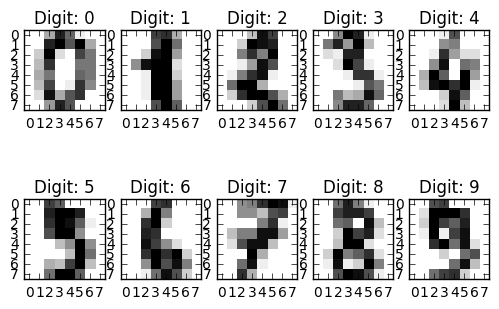

In [26]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 데이터를 읽어오기
digits = datasets.load_digits()

# 이미지를 표시함. 
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()


In [27]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [30]:
label , img , img.shape

(9, array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]), (8, 8))

In [32]:
images = digits.images
labels = digits.target

# 차원을 하나 줄인다. 
images = images.reshape(images.shape[0], -1)

# 결정트리를 생성한다. 
n_samples = len(images)
train_size = int(n_samples * 2 / 3)
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(images[:train_size], labels[:train_size])

# 결정트리의 성능을 확인한다. 
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n',
      accuracy_score(expected, predicted))
print('Confusion matrix:\n',
      confusion_matrix(expected, predicted))

Accuracy:
 0.44908180300500833
Confusion matrix:
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


In [22]:
img , img.shape

(array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]), (8, 8))

In [31]:
n_samples

1797

In [33]:
expected

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [34]:
predicted

array([2, 2, 7, 7, 7, 2, 2, 0, 0, 2, 2, 7, 7, 2, 0, 7, 2, 2, 9, 3, 4, 3,
       3, 0, 2, 2, 2, 4, 3, 2, 7, 0, 3, 3, 2, 7, 2, 0, 0, 7, 7, 2, 3, 2,
       7, 4, 2, 2, 3, 7, 3, 9, 2, 7, 2, 7, 2, 3, 4, 4, 0, 7, 3, 2, 3, 2,
       4, 4, 5, 2, 4, 7, 2, 2, 2, 2, 5, 7, 3, 4, 2, 7, 2, 4, 9, 0, 7, 3,
       2, 0, 3, 2, 3, 2, 3, 2, 7, 2, 3, 0, 2, 3, 3, 0, 3, 2, 7, 2, 9, 0,
       3, 2, 3, 0, 3, 2, 7, 7, 9, 0, 9, 3, 3, 2, 4, 2, 3, 7, 3, 2, 2, 2,
       7, 7, 3, 3, 2, 0, 0, 2, 3, 7, 2, 3, 0, 3, 3, 2, 3, 3, 4, 2, 3, 0,
       2, 2, 2, 4, 9, 2, 3, 0, 9, 2, 2, 2, 3, 0, 0, 2, 7, 2, 3, 2, 2, 7,
       2, 2, 3, 7, 3, 2, 2, 7, 2, 7, 2, 3, 7, 4, 0, 4, 3, 5, 9, 2, 7, 7,
       4, 2, 2, 7, 3, 2, 2, 2, 3, 7, 3, 4, 2, 7, 4, 2, 0, 0, 7, 0, 3, 2,
       3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4,
       3, 2, 7, 2, 9, 0, 9, 3, 3, 2, 3, 0, 9, 2, 9, 2, 2, 3, 7, 4, 3, 3,
       3, 0, 0, 2, 2, 7, 3, 2, 0, 3, 2, 3, 3, 3, 7, 3, 3, 4, 2, 2, 2, 4,
       9, 3, 3, 0, 9, 3, 2, 2, 2, 0, 0, 3, 7, 3, 3,